   #           --------------------------------- Project The Plane Arrive Late -------------------------------------

###   ** Input Data From Google Cloud Storage

In [1]:
!hadoop fs -put Train.csv /user/cloudera/input

put: `/user/cloudera/input': No such file or directory: `hdfs://testdataproc-m/user/cloudera/input'


In [2]:
airline_rdd = spark.read.csv('gs://ku-flight/Train.csv',header=True)

In [3]:
data_test = spark.read.csv('gs://ku-flight/Test.csv',header=True)

In [4]:
airline_rdd.count()

7009728

In [5]:
data_test.count()

7009728

In [6]:
airline_rdd.show()

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2008|    1|         3|        4|   2003|      1955|   2211|      2225|           WN|      335

In [7]:
airline_rdd.printSchema()

root
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- DayofMonth: string (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- CRSDepTime: string (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: string (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: string (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: string (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: string (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: string (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: string (nullable = true)
 |-- CarrierDelay:

In [8]:
airline_rdd.dtypes

[('Year', 'string'),
 ('Month', 'string'),
 ('DayofMonth', 'string'),
 ('DayOfWeek', 'string'),
 ('DepTime', 'string'),
 ('CRSDepTime', 'string'),
 ('ArrTime', 'string'),
 ('CRSArrTime', 'string'),
 ('UniqueCarrier', 'string'),
 ('FlightNum', 'string'),
 ('TailNum', 'string'),
 ('ActualElapsedTime', 'string'),
 ('CRSElapsedTime', 'string'),
 ('AirTime', 'string'),
 ('ArrDelay', 'string'),
 ('DepDelay', 'string'),
 ('Origin', 'string'),
 ('Dest', 'string'),
 ('Distance', 'string'),
 ('TaxiIn', 'string'),
 ('TaxiOut', 'string'),
 ('Cancelled', 'string'),
 ('CancellationCode', 'string'),
 ('Diverted', 'string'),
 ('CarrierDelay', 'string'),
 ('WeatherDelay', 'string'),
 ('NASDelay', 'string'),
 ('SecurityDelay', 'string'),
 ('LateAircraftDelay', 'string')]

In [9]:
header_text = airline_rdd.first()

In [10]:
#airline_noheader_rdd = airline_rdd.filter(lambda row: row!= header_text)

In [11]:
#fieldname_list = header_text.split(',')

In [12]:
airline_rdd.registerTempTable("airlines")

In [13]:
data_test.show()

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|CancellationCode|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+----------------+--------+------------+------------+--------+-------------+-----------------+
|2008|    1|         3|        4|   2003|      1955|   2211|      2225|           WN|      335

In [14]:
data_test.printSchema()

root
 |-- Year: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- DayofMonth: string (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- CRSDepTime: string (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: string (nullable = true)
 |-- UniqueCarrier: string (nullable = true)
 |-- FlightNum: string (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- ActualElapsedTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: string (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: string (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- TaxiOut: string (nullable = true)
 |-- Cancelled: string (nullable = true)
 |-- CancellationCode: string (nullable = true)
 |-- Diverted: string (nullable = true)
 |-- CarrierDelay:

In [15]:
data_test.dtypes

[('Year', 'string'),
 ('Month', 'string'),
 ('DayofMonth', 'string'),
 ('DayOfWeek', 'string'),
 ('DepTime', 'string'),
 ('CRSDepTime', 'string'),
 ('ArrTime', 'string'),
 ('CRSArrTime', 'string'),
 ('UniqueCarrier', 'string'),
 ('FlightNum', 'string'),
 ('TailNum', 'string'),
 ('ActualElapsedTime', 'string'),
 ('CRSElapsedTime', 'string'),
 ('AirTime', 'string'),
 ('ArrDelay', 'string'),
 ('DepDelay', 'string'),
 ('Origin', 'string'),
 ('Dest', 'string'),
 ('Distance', 'string'),
 ('TaxiIn', 'string'),
 ('TaxiOut', 'string'),
 ('Cancelled', 'string'),
 ('CancellationCode', 'string'),
 ('Diverted', 'string'),
 ('CarrierDelay', 'string'),
 ('WeatherDelay', 'string'),
 ('NASDelay', 'string'),
 ('SecurityDelay', 'string'),
 ('LateAircraftDelay', 'string')]

In [16]:
header_text = data_test.first()

In [17]:
data_test.registerTempTable("airliness")

##  Data Cleaning

### Missing Value

In [18]:
airline_rdd.count()

7009728

In [19]:
a = airline_rdd.drop('CancellationCode')

In [20]:
b = a.replace('NA', '')

In [21]:
b.select('ArrDelay').where("ArrDelay like ''").show()

+--------+
|ArrDelay|
+--------+
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
+--------+
only showing top 20 rows



In [22]:
air_arrdelay = b.filter(b["ArrDelay"] != "")

In [23]:
air_arrdelay.count()

6855029

In [24]:
air_arrdelay = air_arrdelay.replace('', '0')

In [25]:
air_arrdelay.show(20)

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+--------+------------+------------+--------+-------------+-----------------+
|2008|    1|         3|        4|   2003|      1955|   2211|      2225|           WN|      335| N712SW|              128|           150|    116| 

In [26]:
air_arrdelay.dtypes

[('Year', 'string'),
 ('Month', 'string'),
 ('DayofMonth', 'string'),
 ('DayOfWeek', 'string'),
 ('DepTime', 'string'),
 ('CRSDepTime', 'string'),
 ('ArrTime', 'string'),
 ('CRSArrTime', 'string'),
 ('UniqueCarrier', 'string'),
 ('FlightNum', 'string'),
 ('TailNum', 'string'),
 ('ActualElapsedTime', 'string'),
 ('CRSElapsedTime', 'string'),
 ('AirTime', 'string'),
 ('ArrDelay', 'string'),
 ('DepDelay', 'string'),
 ('Origin', 'string'),
 ('Dest', 'string'),
 ('Distance', 'string'),
 ('TaxiIn', 'string'),
 ('TaxiOut', 'string'),
 ('Cancelled', 'string'),
 ('Diverted', 'string'),
 ('CarrierDelay', 'string'),
 ('WeatherDelay', 'string'),
 ('NASDelay', 'string'),
 ('SecurityDelay', 'string'),
 ('LateAircraftDelay', 'string')]

In [27]:
data = air_arrdelay['DepTime','CRSDepTime','ArrTime', 'CRSArrTime', 'ActualElapsedTime', \
'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay','Origin','Dest','Distance',\
                    'TaxiIn','TaxiOut','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']

In [28]:
data_test.count()

7009728

In [29]:
a = data_test.drop('CancellationCode')

In [30]:
b = a.replace('NA', '')

In [31]:
b.select('ArrDelay').where("ArrDelay like ''").show()

+--------+
|ArrDelay|
+--------+
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
|        |
+--------+
only showing top 20 rows



In [32]:
data_test = b.filter(b["ArrDelay"] != "")

In [33]:
data_test.count()

6855029

In [34]:
data_test = data_test.replace('', '0')

In [35]:
data_test.show()

+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+--------+------------+------------+--------+-------------+-----------------+
|Year|Month|DayofMonth|DayOfWeek|DepTime|CRSDepTime|ArrTime|CRSArrTime|UniqueCarrier|FlightNum|TailNum|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|Cancelled|Diverted|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|
+----+-----+----------+---------+-------+----------+-------+----------+-------------+---------+-------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+---------+--------+------------+------------+--------+-------------+-----------------+
|2008|    1|         3|        4|   2003|      1955|   2211|      2225|           WN|      335| N712SW|              128|           150|    116| 

In [36]:
data_test.dtypes

[('Year', 'string'),
 ('Month', 'string'),
 ('DayofMonth', 'string'),
 ('DayOfWeek', 'string'),
 ('DepTime', 'string'),
 ('CRSDepTime', 'string'),
 ('ArrTime', 'string'),
 ('CRSArrTime', 'string'),
 ('UniqueCarrier', 'string'),
 ('FlightNum', 'string'),
 ('TailNum', 'string'),
 ('ActualElapsedTime', 'string'),
 ('CRSElapsedTime', 'string'),
 ('AirTime', 'string'),
 ('ArrDelay', 'string'),
 ('DepDelay', 'string'),
 ('Origin', 'string'),
 ('Dest', 'string'),
 ('Distance', 'string'),
 ('TaxiIn', 'string'),
 ('TaxiOut', 'string'),
 ('Cancelled', 'string'),
 ('Diverted', 'string'),
 ('CarrierDelay', 'string'),
 ('WeatherDelay', 'string'),
 ('NASDelay', 'string'),
 ('SecurityDelay', 'string'),
 ('LateAircraftDelay', 'string')]

In [37]:
dataa = air_arrdelay['DepTime','CRSDepTime','ArrTime', 'CRSArrTime', 'ActualElapsedTime', \
'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay','Origin','Dest','Distance',\
                    'TaxiIn','TaxiOut','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']

In [38]:
#df_main.filter(df_main["AirTime"] == "").count()
import numpy

### Cast Data Types

In [39]:
from pyspark.sql.types import IntegerType
from pyspark.sql.types import StringType
from pyspark.ml.feature import StringIndexer
from pyspark.sql.types import BooleanType

In [40]:
dataa = dataa.withColumn("DepTime", dataa["DepTime"].cast(IntegerType()))
dataa = dataa.withColumn("CRSDepTime", dataa["CRSDepTime"].cast(IntegerType()))
dataa = dataa.withColumn("ArrTime", dataa["ArrTime"].cast(IntegerType()))
dataa = dataa.withColumn("CRSArrTime", dataa["CRSArrTime"].cast(IntegerType()))
dataa = dataa.withColumn("ActualElapsedTime", dataa["ActualElapsedTime"].cast(IntegerType()))
dataa = dataa.withColumn("CRSElapsedTime", dataa["CRSElapsedTime"].cast(IntegerType()))
dataa = dataa.withColumn("AirTime", dataa["AirTime"].cast(IntegerType()))
dataa = dataa.withColumn("ArrDelay", dataa["ArrDelay"].cast(IntegerType()))
dataa = dataa.withColumn("DepDelay", dataa["DepDelay"].cast(IntegerType()))
dataa = dataa.withColumn("Distance", dataa["Distance"].cast(IntegerType()))
dataa = dataa.withColumn("TaxiIn", dataa["TaxiIn"].cast(IntegerType()))
dataa = dataa.withColumn("TaxiOut", dataa["TaxiOut"].cast(IntegerType()))
dataa = dataa.withColumn("CarrierDelay", dataa["CarrierDelay"].cast(IntegerType()))
dataa = dataa.withColumn("WeatherDelay", dataa["WeatherDelay"].cast(IntegerType()))
dataa = dataa.withColumn("NASDelay", dataa["NASDelay"].cast(IntegerType()))
dataa = dataa.withColumn("SecurityDelay", dataa["SecurityDelay"].cast(IntegerType()))
dataa = dataa.withColumn("LateAircraftDelay", dataa["LateAircraftDelay"].cast(IntegerType()))
dataa = dataa.withColumn('LabelArrDelay', dataa.ArrDelay)

In [41]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
OriginIndexer = StringIndexer(inputCol="Origin", outputCol="OriginIndex")
#model = stringIndexer.fit(df_main)
#indexed = model.transform(df_main)

Originencoder = OneHotEncoder(inputCol="OriginIndex", outputCol="OriginVec")
#encoded = encoder.transform(indexed)
#encoded.show()

In [42]:
DestIndexer = StringIndexer(inputCol="Dest", outputCol="DestIndex")
#model = stringIndexer.fit(encoded)
#indexed2 = model.transform(encoded)

Destencoder = OneHotEncoder(inputCol="DestIndex", outputCol="DestVec")
#encoded3 = encoder2.transform(indexed2)
#encoded3.show()

In [43]:
UniqueCarrierIndexer = StringIndexer(inputCol="UniqueCarrier", outputCol="UniqueCarrierIndex")
#model = stringIndexer.fit(encoded2)
#index

In [44]:
data = data.withColumn("DepTime", data["DepTime"].cast(IntegerType()))

In [45]:
data = data.withColumn("CRSDepTime", data["CRSDepTime"].cast(IntegerType()))

In [46]:
data = data.withColumn("ArrTime", data["ArrTime"].cast(IntegerType()))

In [47]:
data = data.withColumn("CRSArrTime", data["CRSArrTime"].cast(IntegerType()))

In [48]:
data = data.withColumn("ActualElapsedTime", data["ActualElapsedTime"].cast(IntegerType()))

In [49]:
data = data.withColumn("CRSElapsedTime", data["CRSElapsedTime"].cast(IntegerType()))

In [50]:
data = data.withColumn("AirTime", data["AirTime"].cast(IntegerType()))

In [51]:
data = data.withColumn("ArrDelay", data["ArrDelay"].cast(IntegerType()))

In [52]:
data = data.withColumn("DepDelay", data["DepDelay"].cast(IntegerType()))

In [53]:
data = data.withColumn("Distance", data["Distance"].cast(IntegerType()))

In [54]:
data = data.withColumn("TaxiIn", data["TaxiIn"].cast(IntegerType()))

In [55]:
data = data.withColumn("TaxiOut", data["TaxiOut"].cast(IntegerType()))

In [56]:
data = data.withColumn("CarrierDelay", data["CarrierDelay"].cast(IntegerType()))

In [57]:
data = data.withColumn("WeatherDelay", data["WeatherDelay"].cast(IntegerType()))

In [58]:
data = data.withColumn("NASDelay", data["NASDelay"].cast(IntegerType()))

In [59]:
data = data.withColumn("SecurityDelay", data["SecurityDelay"].cast(IntegerType()))

In [60]:
data = data.withColumn("LateAircraftDelay", data["LateAircraftDelay"].cast(IntegerType()))

In [61]:
data = data.withColumn('LabelArrDelay', data.ArrDelay)

In [62]:
dataa = dataa.withColumn("DepTime", dataa["DepTime"].cast(IntegerType()))
dataa = dataa.withColumn("CRSDepTime", dataa["CRSDepTime"].cast(IntegerType()))
dataa = dataa.withColumn("ArrTime", dataa["ArrTime"].cast(IntegerType()))
dataa = dataa.withColumn("CRSArrTime", dataa["CRSArrTime"].cast(IntegerType()))
dataa = dataa.withColumn("ActualElapsedTime", dataa["ActualElapsedTime"].cast(IntegerType()))
dataa = dataa.withColumn("CRSElapsedTime", dataa["CRSElapsedTime"].cast(IntegerType()))
dataa = dataa.withColumn("AirTime", dataa["AirTime"].cast(IntegerType()))
dataa = dataa.withColumn("ArrDelay", dataa["ArrDelay"].cast(IntegerType()))
dataa = dataa.withColumn("DepDelay", dataa["DepDelay"].cast(IntegerType()))
dataa = dataa.withColumn("Distance", dataa["Distance"].cast(IntegerType()))
dataa = dataa.withColumn("TaxiIn", dataa["TaxiIn"].cast(IntegerType()))
dataa = dataa.withColumn("TaxiOut", dataa["TaxiOut"].cast(IntegerType()))
dataa = dataa.withColumn("CarrierDelay", dataa["CarrierDelay"].cast(IntegerType()))
dataa = dataa.withColumn("WeatherDelay", dataa["WeatherDelay"].cast(IntegerType()))
dataa = dataa.withColumn("NASDelay", dataa["NASDelay"].cast(IntegerType()))
dataa = dataa.withColumn("SecurityDelay", dataa["SecurityDelay"].cast(IntegerType()))
dataa = dataa.withColumn("LateAircraftDelay", dataa["LateAircraftDelay"].cast(IntegerType()))
dataa = dataa.withColumn('LabelArrDelay', dataa.ArrDelay)

### Change label numeric to classifier

In [63]:
#0 is in time,1 is late
data = data.withColumn('LabelArrDelay',(data['ArrDelay']>0).cast(IntegerType()))
dataa = dataa.withColumn('LabelArrDelay',(dataa['ArrDelay']>0).cast(IntegerType()))

In [64]:
data.select('ArrDelay','LabelArrDelay').show()

+--------+-------------+
|ArrDelay|LabelArrDelay|
+--------+-------------+
|     -14|            0|
|       2|            1|
|      14|            1|
|      -6|            0|
|      34|            1|
|      11|            1|
|      57|            1|
|     -18|            0|
|       2|            1|
|     -16|            0|
|       1|            1|
|      80|            1|
|       1|            1|
|      10|            1|
|      -4|            0|
|      11|            1|
|      15|            1|
|     -15|            0|
|      16|            1|
|      37|            1|
+--------+-------------+
only showing top 20 rows



In [65]:
#data = data.withColumn("LabelArrDelay", data["LabelArrDelay"].cast(BooleanType()))

In [66]:
#data.select('ArrDelay','LabelArrDelay')

In [67]:
data.show(3)

+-------+----------+-------+----------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+------------+------------+--------+-------------+-----------------+-------------+
|DepTime|CRSDepTime|ArrTime|CRSArrTime|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|LabelArrDelay|
+-------+----------+-------+----------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+------------+------------+--------+-------------+-----------------+-------------+
|   2003|      1955|   2211|      2225|              128|           150|    116|     -14|       8|   IAD| TPA|     810|     4|      8|           0|           0|       0|            0|                0|            0|
|    754|       735|   1002|      1000|              128|           145|    113|       2|      19|   IAD| TPA|     810|     5|     10|  

In [68]:
data.dtypes

[('DepTime', 'int'),
 ('CRSDepTime', 'int'),
 ('ArrTime', 'int'),
 ('CRSArrTime', 'int'),
 ('ActualElapsedTime', 'int'),
 ('CRSElapsedTime', 'int'),
 ('AirTime', 'int'),
 ('ArrDelay', 'int'),
 ('DepDelay', 'int'),
 ('Origin', 'string'),
 ('Dest', 'string'),
 ('Distance', 'int'),
 ('TaxiIn', 'int'),
 ('TaxiOut', 'int'),
 ('CarrierDelay', 'int'),
 ('WeatherDelay', 'int'),
 ('NASDelay', 'int'),
 ('SecurityDelay', 'int'),
 ('LateAircraftDelay', 'int'),
 ('LabelArrDelay', 'int')]

In [69]:
data.head()

Row(DepTime=2003, CRSDepTime=1955, ArrTime=2211, CRSArrTime=2225, ActualElapsedTime=128, CRSElapsedTime=150, AirTime=116, ArrDelay=-14, DepDelay=8, Origin='IAD', Dest='TPA', Distance=810, TaxiIn=4, TaxiOut=8, CarrierDelay=0, WeatherDelay=0, NASDelay=0, SecurityDelay=0, LateAircraftDelay=0, LabelArrDelay=0)

In [70]:
#dataa.write.csv('gs://ku-flight/Test/*', header = True )

In [71]:
#data.write.csv('gs://ku-flight/Data/*', header = True )

### Pearson Correlation feature and label

In [72]:
! pip install pandas matplotlib seaborn

In [73]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [74]:
s1 = dataa.sample(False, 0.001, seed=42)
s1 = s1.toPandas()

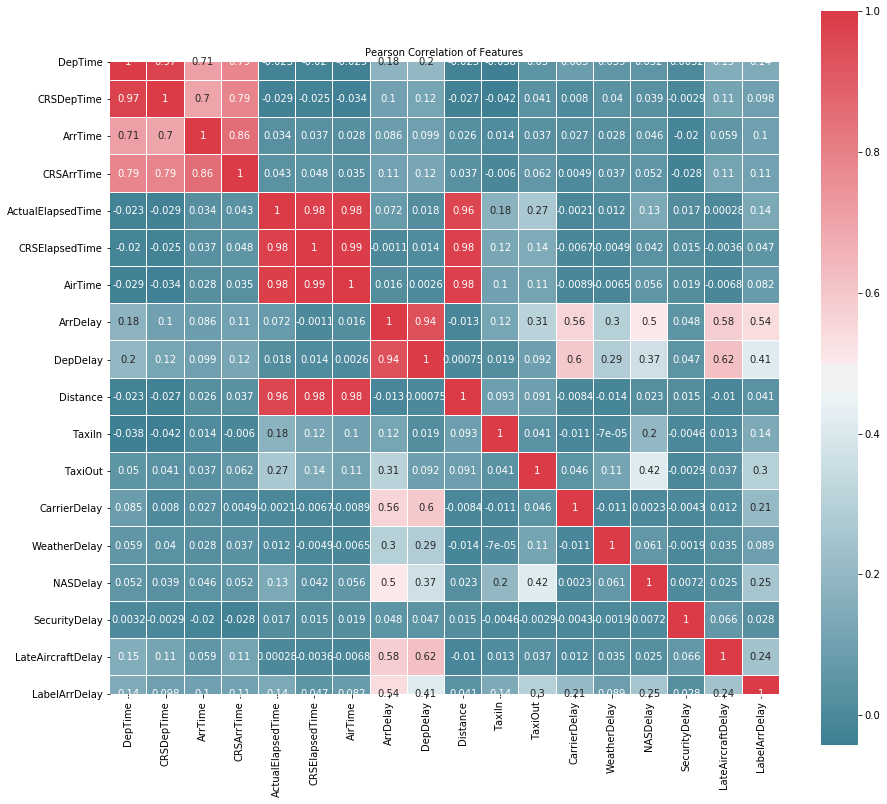

In [75]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(15, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':10 }
    )
    
    plt.title('Pearson Correlation of Features', y=0.5, size=10)

correlation_heatmap(s1)

## Feature Selection

In [76]:
from pyspark.ml.feature import VectorAssembler
fetureAssembler = VectorAssembler(inputCols = ['ActualElapsedTime','DepDelay','CRSElapsedTime',\
                                               'AirTime','Distance','TaxiIn','TaxiOut'],\
                                  outputCol = 'features') 

In [77]:
#fetureAssembler = VectorAssembler (inputCols = ['DepTime','CRSElapsedTime','TaxiIn', 'TaxiOut', 'WeatherDelay', \
#                                                'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],\ 
#                                  outputCol = 'features') 

### Modeling RandomForestClassifier

In [78]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.mllib.tree import RandomForest,RandomForestModel 
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier


In [79]:
rf = RandomForestClassifier(numTrees=5, maxDepth=5, labelCol="LabelArrDelay", featuresCol="features")
 
#pipeline = Pipeline().setStages([vectorAssembler, rf])
delay_df = fetureAssembler.transform(data)
delay_df = delay_df.select(['features', 'LabelArrDelay'])

In [80]:
#train = delay_df.randomSplit([0.7])
#test = delay_df.randomSplit([0.3])

In [81]:
train , test = delay_df.randomSplit([0.7,0.3])

In [82]:
model = rf.fit(train)

In [83]:
result = model.transform(test)

In [84]:
result.show(20)

+--------------------+-------------+--------------------+--------------------+----------+
|            features|LabelArrDelay|       rawPrediction|         probability|prediction|
+--------------------+-------------+--------------------+--------------------+----------+
|[16.0,-36.0,31.0,...|            0|[4.29284426961493...|[0.85856885392298...|       0.0|
|[17.0,-13.0,27.0,...|            0|[4.29284426961493...|[0.85856885392298...|       0.0|
|[18.0,-5.0,27.0,9...|            0|[4.29284426961493...|[0.85856885392298...|       0.0|
|[18.0,1.0,28.0,12...|            0|[3.84751780588419...|[0.76950356117683...|       0.0|
|[18.0,59.0,27.0,9...|            1|[0.81712256901729...|[0.16342451380345...|       1.0|
|[19.0,-27.0,31.0,...|            0|[4.29284426961493...|[0.85856885392298...|       0.0|
|[19.0,-18.0,28.0,...|            0|[4.29284426961493...|[0.85856885392298...|       0.0|
|[19.0,-1.0,27.0,9...|            0|[4.15458504803030...|[0.83091700960606...|       0.0|
|[19.0,27.

In [85]:
display(model)

RandomForestClassificationModel (uid=RandomForestClassifier_46b29ae39bc1fbd6e509) with 5 trees

In [86]:
# treeModel = model.stages[2]

In [87]:
print(display)

<function display at 0x7f61ab3b2d08>


In [88]:
#from sklearn.datasets import load_iris
#iris = load_iris()

# Model (can also use single decision tree)
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=10)

# Train
#model.fit(['features', 'LabelArrDelay'])
# Extract single tree
#estimator = model.estimators_[5]

#from sklearn.tree import export_graphviz
# Export as dot file
#export_graphviz(estimator, out_file='tree.dot', 
#                feature_names = features,
#                class_names = LabelArrDelay,
#                rounded = True, proportion = False, 
#                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
#from subprocess import call
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
#from IPython.display import Image
#Image(filename = 'tree.png')

### Evaluation RandomForestClassifier

In [89]:
evaluator = MulticlassClassificationEvaluator(labelCol="LabelArrDelay",\
                                    predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(result)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.168264


In [90]:
Acc = accuracy*100
print("Accuracy : ",Acc)

Accuracy :  83.17360459537005


In [91]:
result['LabelArrDelay', 'prediction'].show(25)

+-------------+----------+
|LabelArrDelay|prediction|
+-------------+----------+
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            1|       1.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            1|       1.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            0|       1.0|
|            1|       1.0|
|            0|       0.0|
|            0|       0.0|
|            0|       1.0|
|            1|       1.0|
|            1|       1.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            1|       1.0|
|            0|       0.0|
+-------------+----------+
only showing top 25 rows



In [92]:
! pip install plotly
! pip install chart-studio
! pip install pandas

### Confusion Matrix (Random Forest Classification)

In [96]:
def eval_metrics(lap):
    tp = float(len(lap[(lap['LabelArrDelay']==0) & (lap['prediction']==0)]))
    tn = float(len(lap[(lap['LabelArrDelay']==1) & (lap['prediction']==1)]))
    fp = float(len(lap[(lap['LabelArrDelay']==1) & (lap['prediction']==0)]))
    fn = float(len(lap[(lap['LabelArrDelay']==0) & (lap['prediction']==1)]))
    positivepredictivevalue = tp / (tp+fp)
    negativepredictivevalue = tn / (tn+fn)
    sensitivity = tp / (tp+fn)
    specificity = tn / (tn+fp)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    print ("tp: ", tp)
    print ("tn: ", tn)
    print ("fp: ", fp)
    print ("fn: ", fn)
    return {'PPV': positivepredictivevalue, 'NPV':negativepredictivevalue,'Sensitivity': sensitivity, 
        'Specificity': specificity, 'Accuracy': accuracy}

In [97]:
lap = result.select("LabelArrDelay", "prediction").toPandas()

In [98]:
m = eval_metrics(lap)
m

tp:  1053965.0
tn:  658676.0
fp:  236792.0
fn:  109683.0


{'PPV': 0.8165479637143165,
 'NPV': 0.8572503217896843,
 'Sensitivity': 0.9057421144538554,
 'Specificity': 0.7355662067209549,
 'Accuracy': 0.8317360459537005}

In [99]:
pipeline = Pipeline( stages = [rf] )

In [100]:
#Hyperparameter tuning
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
paramGrid = ParamGridBuilder().addGrid(rf.maxDepth, [3, 5]).build()

In [101]:
#Cross Validation
from pyspark.ml.evaluation import RegressionEvaluator
crossval = CrossValidator(estimator=pipeline, estimatorParamMaps=paramGrid, 
                          evaluator=MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='LabelArrDelay', metricName='accuracy'), numFolds=2)  
# use 3+ folds in practice

In [102]:
cvModel = crossval.fit(train)

In [103]:
prediction = cvModel.bestModel.transform(test)

In [104]:
accuracy = evaluator.evaluate(prediction)
#print("Test Error = %g" % (1.0 - r2))

In [105]:
prediction['LabelArrDelay', 'prediction'].show()

+-------------+----------+
|LabelArrDelay|prediction|
+-------------+----------+
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            1|       1.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            1|       1.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            0|       1.0|
|            1|       1.0|
|            0|       0.0|
|            0|       0.0|
|            0|       1.0|
|            1|       1.0|
|            1|       1.0|
|            0|       0.0|
+-------------+----------+
only showing top 20 rows



#### save file csv

In [106]:
prediction.write.csv('gs://ku-flight/Random Forest/*', header = True )

# Modeling DecisionTree

In [107]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.mllib.tree import RandomForest,RandomForestModel 
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier

In [108]:
fetureAssembler = VectorAssembler(inputCols = ['ActualElapsedTime','DepDelay','CRSElapsedTime',\
                                               'AirTime','Distance','TaxiIn','TaxiOut'],\
                                  outputCol = 'features') #,'OriginVec','DestVec'

In [109]:
rf = DecisionTreeClassifier( labelCol="LabelArrDelay", featuresCol="features" )
 
#pipeline = Pipeline().setStages([vectorAssembler, rf])
delay_df = fetureAssembler.transform(data)
delay_df = delay_df.select(['features', 'LabelArrDelay'])

In [110]:
train , test = delay_df.randomSplit([0.7,0.3])

In [111]:
train , test = delay_df.randomSplit([0.7,0.3])

In [112]:
model2 = rf.fit(train)

In [113]:
result = model2.transform(test)

In [114]:
result.show()

+--------------------+-------------+--------------------+--------------------+----------+
|            features|LabelArrDelay|       rawPrediction|         probability|prediction|
+--------------------+-------------+--------------------+--------------------+----------+
|[16.0,-36.0,31.0,...|            0|[1371645.0,128771.0]|[0.91417646839276...|       0.0|
|[17.0,-21.0,32.0,...|            0|[1371645.0,128771.0]|[0.91417646839276...|       0.0|
|[17.0,-13.0,28.0,...|            0|[1371645.0,128771.0]|[0.91417646839276...|       0.0|
|[17.0,48.0,34.0,7...|            1|    [464.0,518601.0]|[8.93915020276843...|       1.0|
|[18.0,-13.0,28.0,...|            0|[1371645.0,128771.0]|[0.91417646839276...|       0.0|
|[18.0,-5.0,27.0,9...|            0|[1371645.0,128771.0]|[0.91417646839276...|       0.0|
|[18.0,1.0,28.0,12...|            0|  [337963.0,99630.0]|[0.77232268340672...|       0.0|
|[18.0,59.0,27.0,9...|            1|    [464.0,518601.0]|[8.93915020276843...|       1.0|
|[19.0,-9.

In [115]:
result

DataFrame[features: vector, LabelArrDelay: int, rawPrediction: vector, probability: vector, prediction: double]

In [116]:
display(model2)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_48a6894e321bc4c8d92c) of depth 5 with 63 nodes

In [117]:
data.show()

+-------+----------+-------+----------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+------------+------------+--------+-------------+-----------------+-------------+
|DepTime|CRSDepTime|ArrTime|CRSArrTime|ActualElapsedTime|CRSElapsedTime|AirTime|ArrDelay|DepDelay|Origin|Dest|Distance|TaxiIn|TaxiOut|CarrierDelay|WeatherDelay|NASDelay|SecurityDelay|LateAircraftDelay|LabelArrDelay|
+-------+----------+-------+----------+-----------------+--------------+-------+--------+--------+------+----+--------+------+-------+------------+------------+--------+-------------+-----------------+-------------+
|   2003|      1955|   2211|      2225|              128|           150|    116|     -14|       8|   IAD| TPA|     810|     4|      8|           0|           0|       0|            0|                0|            0|
|    754|       735|   1002|      1000|              128|           145|    113|       2|      19|   IAD| TPA|     810|     5|     10|  

In [118]:
conda install matplotlib

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [119]:
! pip install matplotlib

In [120]:
! pip install pydot
! pip install pydotplus
! pip install sklearn
! pip install IPython
! pip install graphviz

In [121]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.datasets as datasets
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz

import pandas as pd
import pydotplus

from IPython.display import Image

/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [122]:
# from spark_tree_plotting import generate_tree_json

# tree_json = generate_tree_json(DecisionTreeClassifier_4dcaa2cc54af86f85041,
#                                withNodeIDs=True # each tree with node ID
#                               )

In [123]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
dtree = DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

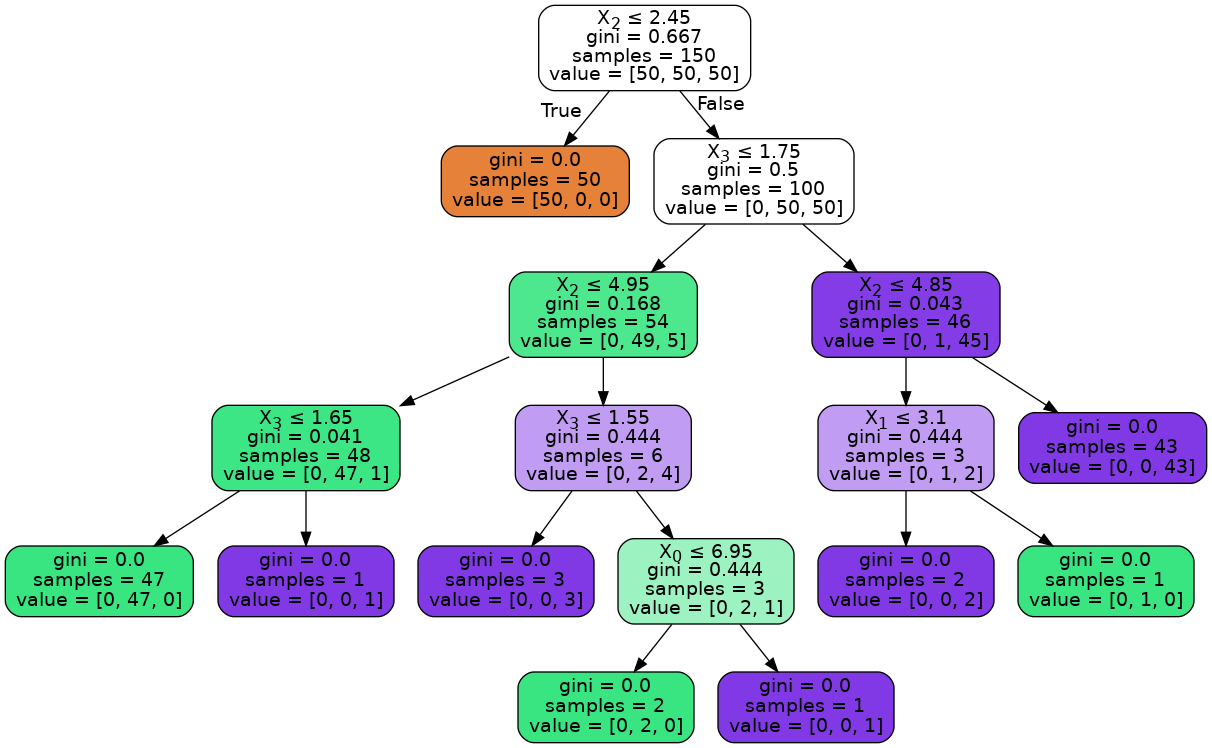

In [124]:
dot_data = StringIO()
export_graphviz(
    dtree, 
    out_file = dot_data,
    filled = True, 
    rounded = True,
    special_characters = True
)
graph_1 = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph_1.create_png())

In [125]:
# iris = data
# df = pd.DataFrame(data.data, columns=data.features)
# y = data.LabelArrDelay
# dtree = DecisionTreeClassifier(DecisionTreeClassifier_4dcaa2cc54af86f85041)
# dtree.fit(df,y)

In [126]:
# dot_data = StringIO()
# export_graphviz(
#    model, 
#    out_file = dot_data,
#    filled = True, 
#    rounded = True,
#    special_characters = True
#)
#graph_1 = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph_1.create_png())

## Evaluation DecisionTree 

In [127]:
evaluator = MulticlassClassificationEvaluator(labelCol="LabelArrDelay"\
                    , predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(result)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.171112


In [128]:
Acc = accuracy*100
print("Accuracy : ",Acc)

Accuracy :  82.88876385971858


In [129]:
result['LabelArrDelay', 'prediction'].show(25)

+-------------+----------+
|LabelArrDelay|prediction|
+-------------+----------+
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            1|       1.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            1|       1.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            0|       1.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            0|       0.0|
|            1|       1.0|
+-------------+----------+
only showing top 25 rows



#### save file prediction

In [130]:
prediction.write.csv('gs://ku-flight/Decision Tree/*', header = True )

In [131]:
print(model2)

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_48a6894e321bc4c8d92c) of depth 5 with 63 nodes


### Confusion Matrix (DecisionTree Classification)

In [133]:
def eval_metrics(lap):
    tp = float(len(lap[(lap['LabelArrDelay']==0) & (lap['prediction']==0)]))
    tn = float(len(lap[(lap['LabelArrDelay']==1) & (lap['prediction']==1)]))
    fp = float(len(lap[(lap['LabelArrDelay']==1) & (lap['prediction']==0)]))
    fn = float(len(lap[(lap['LabelArrDelay']==0) & (lap['prediction']==1)]))
    positivepredictivevalue = tp / (tp+fp)
    negativepredictivevalue = tn / (tn+fn)
    sensitivity = tp / (tp+fn)
    specificity = tn / (tn+fp)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    print ("tp: ", tp)
    print ("tn: ", tn)
    print ("fp: ", fp)
    print ("fn: ", fn)
    return {'PPV': positivepredictivevalue, 'NPV':negativepredictivevalue,'Sensitivity': sensitivity, \
        'Specificity': specificity, 'Accuracy': accuracy}

In [134]:
lap = result.select("LabelArrDelay", "prediction").toPandas()

In [135]:
m = eval_metrics(lap)
m 

tp:  1059869.0
tn:  644663.0
fp:  248974.0
fn:  102903.0


{'PPV': 0.8097755040138505,
 'NPV': 0.8623492775219846,
 'Sensitivity': 0.911501996952111,
 'Specificity': 0.7213924669636552,
 'Accuracy': 0.8288876385971857}

## Modeling Naive Bayes

In [136]:
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.classification import NaiveBayes, NaiveBayesModel
from pyspark.mllib.util import MLUtils

In [141]:
fetureAssembler2 = VectorAssembler(inputCols = ['ActualElapsedTime','DepDelay','CRSElapsedTime',\
                                               'AirTime','Distance','TaxiIn','TaxiOut'],\
                                  outputCol = 'features') #,'OriginVec','DestVec'

In [142]:
#data = MLUtils.loadLibSVMFile(sc, "data/mllib/sample_libsvm_data.txt")

In [149]:
training, test = data.randomSplit([0.6, 0.4])

# Train a NaiveBayes model
nb = NaiveBayes(smoothing=1.0, modelType="multinomial")

# Chain labelIndexer, vecAssembler and NBmodel in a 
pipeline = Pipeline(stages=[labelIndexer, fetureAssembler2, nb])

# Run stages in pipeline and train model
model = pipeline.fit(training)

In [152]:
result = model2.transform(test)

In [153]:
result.show()

+--------------------+-------------+--------------------+--------------------+----------+
|            features|LabelArrDelay|       rawPrediction|         probability|prediction|
+--------------------+-------------+--------------------+--------------------+----------+
|[15.0,24.0,47.0,1...|            0|[0.82771581039629...|[0.16554316207925...|       1.0|
|[18.0,-14.0,28.0,...|            0|[4.30410198356909...|[0.86082039671381...|       0.0|
|[18.0,-3.0,28.0,9...|            0|[4.16553723221555...|[0.83310744644311...|       0.0|
|[19.0,-1.0,27.0,9...|            0|[4.16553723221555...|[0.83310744644311...|       0.0|
|[19.0,27.0,27.0,1...|            1|[0.82771581039629...|[0.16554316207925...|       1.0|
|[19.0,47.0,27.0,9...|            1|[0.82771581039629...|[0.16554316207925...|       1.0|
|[20.0,-36.0,31.0,...|            0|[4.30410198356909...|[0.86082039671381...|       0.0|
|[20.0,-21.0,27.0,...|            0|[4.30410198356909...|[0.86082039671381...|       0.0|
|[20.0,-15

### Evaluation Naive Bayes

In [154]:
evaluator = MulticlassClassificationEvaluator(labelCol="LabelArrDelay"\
                    , predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(result)
print("Test Error = %g" % (1.0 - accuracy))

Test Error = 0.168724


In [155]:
Acc = accuracy*100
print("Test set accuracy = " + str(accuracy))

Test set accuracy = 0.8312758181392379


### Confusion Matrix (Naive Bayes)

In [156]:
def eval_metrics(lap):
    tp = float(len(lap[(lap['LabelArrDelay']==0) & (lap['prediction']==0)]))
    tn = float(len(lap[(lap['LabelArrDelay']==1) & (lap['prediction']==1)]))
    fp = float(len(lap[(lap['LabelArrDelay']==1) & (lap['prediction']==0)]))
    fn = float(len(lap[(lap['LabelArrDelay']==0) & (lap['prediction']==1)]))
    positivepredictivevalue = tp / (tp+fp)
    negativepredictivevalue = tn / (tn+fn)
    sensitivity = tp / (tp+fn)
    specificity = tn / (tn+fp)
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    print ("tp: ", tp)
    print ("tn: ", tn)
    print ("fp: ", fp)
    print ("fn: ", fn)
    return {'PPV': positivepredictivevalue, 'NPV':negativepredictivevalue,'Sensitivity': sensitivity, \
        'Specificity': specificity, 'Accuracy': accuracy}

In [157]:
lap = result.select("LabelArrDelay", "prediction").toPandas()

In [158]:
m = eval_metrics(lap)
m 

tp:  1052283.0
tn:  658604.0
fp:  236465.0
fn:  110794.0


{'PPV': 0.8165157191320569,
 'NPV': 0.8559991057944003,
 'Sensitivity': 0.9047406147658323,
 'Specificity': 0.7358136635276163,
 'Accuracy': 0.8312758181392379}

#### save file prediction

In [159]:
prediction.write.csv('gs://ku-flight/Naive Bayes/*', header = True )

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

# Model (can also use single decision tree)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
trainingDF = spark.read.format("libsvm").load("/databricks-datasets/mnist-digits/data-001/mnist-digits-train.txt").cache()
testDF = spark.read.format("libsvm").load("/databricks-datasets/mnist-digits/data-001/mnist-digits-test.txt").cache()

from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline

indexer = StringIndexer().setInputCol("label").setOutputCol("indexedLabel")

dtc = DecisionTreeClassifier().setLabelCol("indexedLabel")

# Chain indexer + dtc together into a single ML Pipeline.
pipeline = Pipeline().setStages([indexer, dtc])

model = pipeline.fit(trainingDF)
display(model.stages[-1])